# Practical 7
Train and visualize the decision boundaries of manually implemented Support Vector Machine (SVM) models using both linear and Radial Basis Function (RBF) kernels on a synthetic dataset.

## Generate synthetic data


In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

## Implement svm with linear kernel

In [2]:
import numpy as np

class LinearSVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.lr * y_[idx]

    def predict(self, X):
        linear_model = np.dot(X, self.weights) - self.bias
        return np.sign(linear_model)

## Implement svm with rbf kernel

In [3]:
import numpy as np

class RBFSVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=1000, gamma=0.1):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.gamma = gamma
        self.weights = None
        self.bias = None
        self.X_train = None
        self.y_train = None

    def rbf_kernel(self, x1, x2):
        return np.exp(-self.gamma * np.sum((x1 - x2)**2))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Store training data for kernel calculations during prediction
        self.X_train = X
        self.y_train = np.where(y <= 0, -1, 1) # Convert labels to -1 and 1

        # Initialize weights (alpha values in the dual form) and bias
        self.weights = np.zeros(n_samples) # Weights correspond to each training sample in the dual form
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            for i in range(n_samples):
                # Calculate the decision boundary value for the current sample
                decision_boundary = 0
                for j in range(n_samples):
                    decision_boundary += self.weights[j] * self.rbf_kernel(self.X_train[i], self.X_train[j])

                condition = self.y_train[i] * (decision_boundary - self.bias) >= 1

                if condition:
                    # Update weights (alpha values) - regularization term
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    # Update weights (alpha values) and bias - regularization and hinge loss
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - self.y_train[i] * np.array([self.rbf_kernel(self.X_train[i], self.X_train[j]) for j in range(n_samples)]))
                    self.bias -= self.lr * self.y_train[i]


    def predict(self, X):
        n_samples_test = X.shape[0]
        predictions = np.zeros(n_samples_test)

        for i in range(n_samples_test):
            decision_boundary = 0
            for j in range(self.X_train.shape[0]):
                decision_boundary += self.weights[j] * self.rbf_kernel(X[i], self.X_train[j])
            predictions[i] = np.sign(decision_boundary - self.bias)

        return predictions

## Train and evaluate models

Train both the linear and RBF kernel SVM models on the generated data.


In [4]:
linear_svm = LinearSVM()
linear_svm.fit(X, y)

rbf_svm = RBFSVM()
rbf_svm.fit(X, y)

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

linear_svm = LinearSVM()
linear_svm.fit(X, y)

rbf_svm = RBFSVM()
rbf_svm.fit(X, y)

## Visualize decision boundaries

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

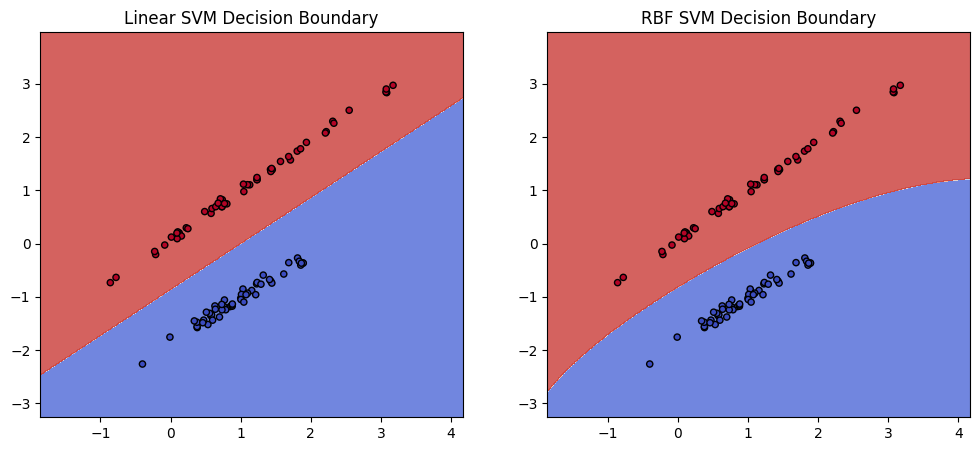

In [7]:
# Predict for linear SVM
Z_linear = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

# Predict for RBF SVM
Z_rbf = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot linear SVM decision boundary
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Linear SVM Decision Boundary')

# Plot RBF SVM decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('RBF SVM Decision Boundary')

plt.show()